# Convolutional Neutral Network 
## Objectives: 
Building Convolutional Neutral Networks (CNN) to: 
* Learn and train based on the matrix of features by building convolutional neutral network layers 
* Use feature detectors (filters - e.g., sharpen, blur, edge detect) to find features in the images by convolving with input images to build feature maps
* Apply ReLu (Rectifier linear Unit) to break up non-linearity (images are highly non-linear)
* Apply MaxPooling to complete downsampling the feature maps to form Pooled Feature Maps
* Flattening the Pooled Feature Maps which forms the input layer
* Apply stochastic gradient descent to minimise the lose function
* Complete backpropagation to adjusts the weights 
* Complete parameter tuning if necessary 

## Steps: 
1) Visualise the dataset, transform the image and label data to be the correct dimensions (shape) and complete normalisation ready for CNN

2) Initialise CNN
    
3) Add first CNN layer with input shape of 28x28 pixels as our sample size, creating 32 feature maps using a feature detector with a kernel size of 3x3 matrix.

4) Add second CNN layer to improve model's accuracy 
  
5) Complete MaxPooling, Regularization and Flattening 

6) Add output layer with 10 nodes (for classifying digit 0 to 9), using the softmax activation function. 

6) Apply stochastic gradient descent to achieve a set of optimal weights

7) Evaluate the model, visualise the analysis results

Scenario: To build a classification model for a digit recongition system

### Dataset: 

MNIST: http://yann.lecun.com/exdb/mnist/

The MNIST database of handwritten digits, available from the link above, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.        

In [1]:
import numpy as np
np.random.seed(123)  # for reproducible results
from scipy import misc
import tensorflow as tf
import h5py
import matplotlib.pyplot as plt
%matplotlib inline

/Users/jasminelatham/anaconda/envs/py35/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#import mnist dataset
import keras
from keras.datasets import mnist
from keras.utils import np_utils

Using TensorFlow backend.


In [3]:
#import keras libraries
from keras.models import Sequential #feedforward CNN
from keras.layers import Dense, Dropout, Activation, Flatten #core layers
from keras.layers import Convolution2D, MaxPooling2D #CNN layers

In [4]:
import coremltools
# coremltools supports Keras version 2.0.6
print('keras version ', keras.__version__)

keras version  2.1.3


In [5]:
#Setting variables for MNIST image dimensions
mnist_image_height = 28
mnist_image_width = 28

In [6]:
#Import train and test sets of MNIST data
(X_img_train, y_img_train), (X_img_test, y_img_test) = mnist.load_data()

In [7]:
#Inspect the downloaded data
print("Shape of training dataset (depth,rows,columns): {}".format((X_img_train.shape)))
print("Shape of test dataset (depth,rows,columns): {}".format((X_img_test.shape)))

Shape of training dataset (depth,rows,columns): (60000, 28, 28)
Shape of test dataset (depth,rows,columns): (10000, 28, 28)


## Visualise one image

Label for image: 0


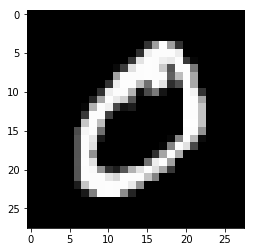

In [8]:
plt.figure()
plt.imshow(X_img_train[1], cmap='gray')
print("Label for image: {}".format(y_img_train[1]))

## Visualise the first digit class

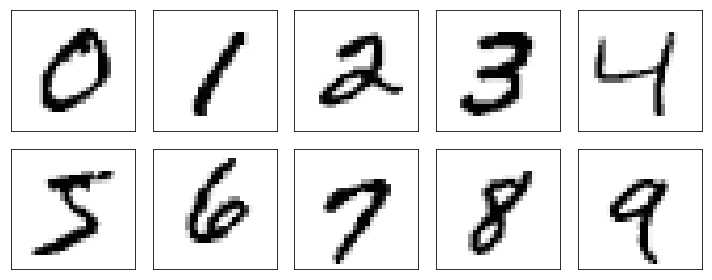

In [9]:
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True, figsize=(10,4))
ax = ax.flatten()
for i in range(10):
    img = X_img_train[y_img_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

## Visualise 30 different versions of a digit

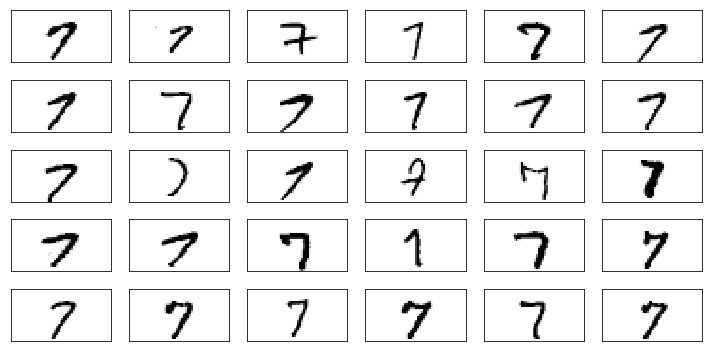

In [10]:
fig, ax = plt.subplots(nrows=5, ncols=6, sharex=True, sharey=True, figsize=(10,5))
ax = ax.flatten()
for i in range(30):
    img = X_img_train[y_img_train == 7][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

## Preprocess input images
* Theano backend requires RGB to be explictly stated, i.e., Greyscale = 1, colour = 3 
* First, Reshape the input data (depth, rows, height) to (depth, rows, height, Greyscale)

In [11]:
X_train = X_img_train.reshape(X_img_train.shape[0], 28, 28, 1)
X_test = X_img_test.reshape(X_img_test.shape[0], 28, 28, 1)

In [12]:
#Transform data type to float32, and normalise values to the range [0,1]
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

## Preprocess image labels

In [13]:
# inspect y_train: it is a 1-D array
print(y_img_train.shape)

(60000,)


### Inspecting the first 10 labels. We can see the digit numerical values not the digit labels

In [14]:
print (y_img_train[:10])

[5 0 4 1 9 2 1 3 1 4]


### Transforming 1-D array of digit values to 10-D matrices of categorical digit labels

In [15]:
Y_train = np_utils.to_categorical(y_img_train, 10)
Y_test = np_utils.to_categorical(y_img_test, 10)

### Inspect the shape, ensure it is in the correct form

In [16]:
print(Y_train.shape)

(60000, 10)


## Initialising the CNN as sequence of layers

In [17]:
model = Sequential()

## Adding the first convolution layer 
* Convolution (maintain the spatial structure)
* Apply ReLu (Rectifier linear Unit) to break up non-linearity (images are highly non-linear)
* filters: number of filters is equalled to the number of feature maps we want to create, in this example, we create 32 x feature maps
* kernel_size: no. of rows and columns for the feature dectector, in this example, we create 3x3 matrix as our feature detector
* input_shape: convert input images into 2D or 3D array, in this example, our input images are greyscale images, so we convert to 2D array of 28 pixels by 28 pixels 
* for 3D images, then we set to 3 instead of 1 to create 3D array

In [18]:
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28,1))) # (rows,columns,greyscale)

# Inspect the shape of the model 
print(model.output_shape)

(None, 26, 26, 32)


## Adding the second convolution layer
* Apply MaxPooling to complete downsampling the feature maps to form Pooled Feature Maps. 
* Reducing the number of parameters in our model by sliding a 2x2 pooling filter across the previous layer. 
* pool_size: halve the input in both spatial dimension
* Flattening the Pooled Feature Maps which forms the input layer

In [19]:
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Dropout(0.25)) #Regularizing the model to prevent overfitting
model.add(Flatten())#Flattening

## Fully connected the layers
* connect the input layer, 128 is the total number of o/p nodes for that layer, common practice is 128 or 2^(x) for hidden layers
* Add output layer with 10 nodes (for classifying digit 0 to 9), using the softmax activation function. 

In [20]:
model.add(Dense(128, activation='relu'))   
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax')) #connect the output layer, 10 = 0 to 9 digits
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

## Applying Stochastic Gradient Descent
* Adam is a variant of SGD for its effeciency and the coresponding loss function to be optimsed in order to achieve a set of optimal weights of the CNN. 
* The loss function for adam SGD is Logarithmic Loss. 
* For a binary classification outcome, the loss = binary_crossentropy. 
* For a categorical outcome, the loss = categorical_crossentrophy. 
* During each Epoch (observations) training, after all weights have been updated, accuracy metric is used to improve the model. 

In [21]:
model.compile(optimizer = 'adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
#Callback
histories = keras.callbacks.History()
#from keras.callbacks import History
#histories = History()

callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='best_model.{epoch:02d}-{val_loss:.2f}.h5',
        monitor='val_loss', save_best_only=True),
    keras.callbacks.EarlyStopping(monitor='acc', patience=2), 
    histories
]

In [23]:
#FItting the CNN to the Training set 
### Run a batch size of 32 observations before all the weights are updated. 
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1, validation_data = (X_test, Y_test), callbacks = callbacks_list)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 69s 1ms/step - loss: 0.2102 - acc: 0.9363 - val_loss: 0.0438 - val_acc: 0.9847
Epoch 2/10
60000/60000 [==============================] - 65s 1ms/step - loss: 0.0899 - acc: 0.9731 - val_loss: 0.0367 - val_acc: 0.9875
Epoch 3/10
60000/60000 [==============================] - 65s 1ms/step - loss: 0.0671 - acc: 0.9797 - val_loss: 0.0351 - val_acc: 0.9883
Epoch 4/10
60000/60000 [==============================] - 66s 1ms/step - loss: 0.0568 - acc: 0.9826 - val_loss: 0.0323 - val_acc: 0.9902ss: - ETA: 1s - loss: 0.0569 - acc: 0. - ETA: 0s - loss: 0.0569
Epoch 5/10
60000/60000 [==============================] - 66s 1ms/step - loss: 0.0484 - acc: 0.9857 - val_loss: 0.0315 - val_acc: 0.9903
Epoch 6/10
60000/60000 [==============================] - 66s 1ms/step - loss: 0.0411 - acc: 0.9870 - val_loss: 0.0310 - val_acc: 0.9902
Epoch 7/10
60000/60000 [==============================] - 66s 1ms

## Evaluating the model 

In [24]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('\nThe {0} function of the test set is: {1:0.3}'.format(model.metrics_names[0],score[0]))
print('The {0} of the test set is: {1:0.3%}'.format(model.metrics_names[1],score[1]))
score = model.evaluate(X_train, Y_train, verbose=0)
print('\nThe {0} function of the training set is: {1:0.3}'.format(model.metrics_names[0],score[0]))
print('The {0} of the training set is: {1:0.3%}'.format(model.metrics_names[1],score[1]))


The loss function of the test set is: 0.0296
The acc of the test set is: 99.180%

The loss function of the training set is: 0.0062
The acc of the training set is: 99.813%


In [25]:
print(histories.history.keys())

dict_keys(['loss', 'val_acc', 'acc', 'val_loss'])


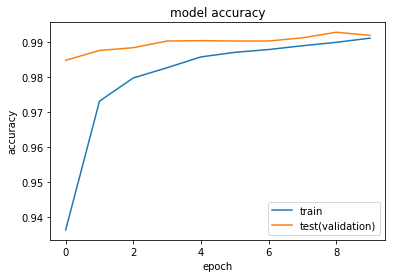

In [26]:
# summarize history for accuracy
plt.plot(histories.history['acc'])
plt.plot(histories.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test(validation)'], loc='lower right')
plt.show()

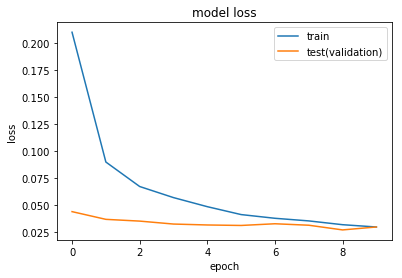

In [27]:
# summarize history for loss
plt.plot(histories.history['loss'])
plt.plot(histories.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test(validation)'], loc='upper right')
plt.show()

## Making the predictions and visualising the results
* Showing a sample of 36 test images and the corresponding results
* T:   Ground Truth
* P:   Predicted Result

In [28]:
# Step 9 - CNN Model Prediction  
y_pred = model.predict(X_test)

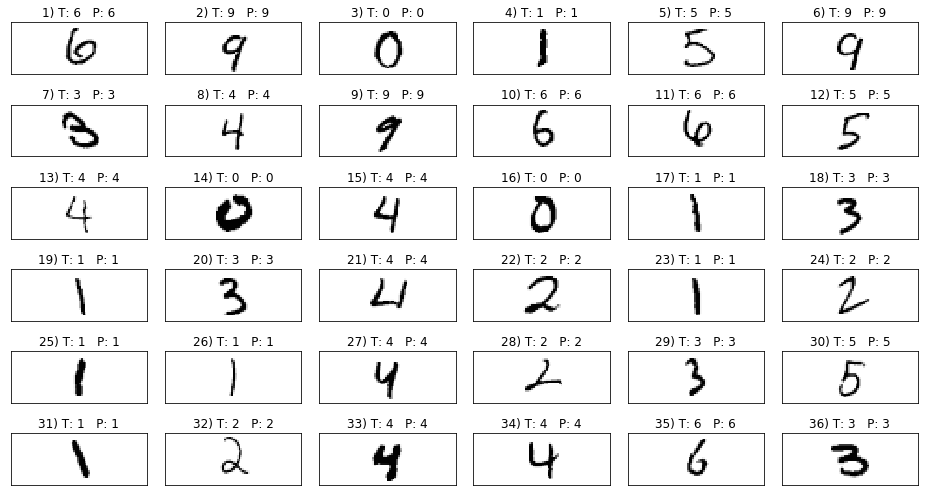

In [29]:
miscl_img = X_test[y_img_test != np.argmax(y_pred)][10:46]
actual_labels = y_img_test[y_img_test != np.argmax(y_pred)][10:46]
predicted_labels = y_pred[y_img_test != np.argmax(y_pred)][10:46]

fig, ax = plt.subplots(nrows=6, ncols=6, sharex=True, sharey=True, figsize=(13,7))
ax = ax.flatten()
for i in range (36):
    img = miscl_img[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title('{}) T: {}   P: {}' .format(i+1, actual_labels[i], np.argmax(predicted_labels[i])))
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

## Convert to Core ML Model

In [31]:
output_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
# For the first argument, use the filename of the newest .h5 file in the notebook folder.
coreml_mnist = coremltools.converters.keras.convert(
    'best_model.09-0.03.h5', input_names=['image'], output_names=['output'], 
    class_labels=output_labels, image_input_names='image')

0 : conv2d_1_input, <keras.engine.topology.InputLayer object at 0x1a3458f940>
1 : conv2d_1, <keras.layers.convolutional.Conv2D object at 0x1a3458f748>
2 : conv2d_1__activation__, <keras.layers.core.Activation object at 0x1a3583ed68>
3 : conv2d_2, <keras.layers.convolutional.Conv2D object at 0x1a34615470>
4 : conv2d_2__activation__, <keras.layers.core.Activation object at 0x1a3583eba8>
5 : max_pooling2d_1, <keras.layers.pooling.MaxPooling2D object at 0x1a34588518>
6 : flatten_1, <keras.layers.core.Flatten object at 0x1a3458f9b0>
7 : dense_1, <keras.layers.core.Dense object at 0x1a34544630>
8 : dense_1__activation__, <keras.layers.core.Activation object at 0x1a357efef0>
9 : dense_2, <keras.layers.core.Dense object at 0x1a345600b8>
10 : dense_2__activation__, <keras.layers.core.Activation object at 0x1a35892d30>


### Inspect Core ML model

Check the input type is `imageType`, not multi array

In [33]:
print(coreml_mnist)

input {
  name: "image"
  type {
    imageType {
      width: 28
      height: 28
      colorSpace: GRAYSCALE
    }
  }
}
output {
  name: "output"
  type {
    dictionaryType {
      stringKeyType {
      }
    }
  }
}
output {
  name: "classLabel"
  type {
    stringType {
    }
  }
}
predictedFeatureName: "classLabel"
predictedProbabilitiesName: "output"



### Add Metadata for Xcode

In [34]:
coreml_mnist.author = 'jasminelatham'
coreml_mnist.license = 'JasmineLatham'
coreml_mnist.short_description = 'Image based digit recognition (MNIST)'
coreml_mnist.input_description['image'] = 'Digit image'
coreml_mnist.output_description['output'] = 'Probability of each digit'
coreml_mnist.output_description['classLabel'] = 'Labels of digits'

In [35]:
coreml_mnist.save('MNISTClassifier.mlmodel')